In [1]:
from tensorflow.keras.layers import Input,Conv2D,Concatenate,Add,SeparableConv2D,ReLU
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense,BatchNormalization,Dropout,AveragePooling2D,Activation,GlobalAveragePooling2D,ZeroPadding2D,MaxPooling2D
from tensorflow.keras import Model
from tensorflow.keras import regularizers
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#!unzip path_to_file.zip -d path_to_directory
#!unzip '/content/drive/MyDrive/Tomato.zip' -d '/content/drive/MyDrive/Tomato'
#old_name = r"/content/EXP.csv"
#new_name = r"/content/EXP_NEW.csv"
#os.rename(old_name, new_name)

In [5]:
!ls '/content/drive/MyDrive/Tomato/tomato/train'

'Bacterial Spot'   Healthy	 'Leaf Mold'
'Early Blight'	  'Late Blight'  'Tomato Mosaic Virus'


In [6]:
!ls '/content/drive/MyDrive/Tomato/tomato/val'

'Bacterial Spot'   Healthy	 'Leaf Mold'
'Early Blight'	  'Late Blight'  'Tomato Mosaic Virus'


In [7]:
dataset_path_train = os.listdir('/content/drive/MyDrive/Tomato/tomato/train')

In [8]:
dataset_path_validation = os.listdir('/content/drive/MyDrive/Tomato/tomato/val')

In [9]:
disease_items_train=[]

for item in dataset_path_train:
  all_disease = os.listdir('/content/drive/MyDrive/Tomato/tomato/train' +'/'+item)
  for disease in all_disease:
    disease_items_train.append((item , str('/content/drive/MyDrive/Tomato/tomato/train'+'/'+item ) +'/'+disease ))

In [10]:
train_disease_df = pd.DataFrame(data=disease_items_train,columns = ['Train_Disease_Type' ,'Train_Disease_Image'])
train_disease_df.head()

,Train_Disease_Type,Train_Disease_Image
0,Bacterial Spot,/content/drive/MyDrive/Tomato/tomato/train/Bac...
1,Bacterial Spot,/content/drive/MyDrive/Tomato/tomato/train/Bac...
2,Bacterial Spot,/content/drive/MyDrive/Tomato/tomato/train/Bac...
3,Bacterial Spot,/content/drive/MyDrive/Tomato/tomato/train/Bac...
4,Bacterial Spot,/content/drive/MyDrive/Tomato/tomato/train/Bac...


In [11]:
disease_items_test=[]

for item in dataset_path_validation:
  all_disease = os.listdir('/content/drive/MyDrive/Tomato/tomato/val' +'/'+item)
  for disease in all_disease:
    disease_items_test.append((item , str('/content/drive/MyDrive/Tomato/tomato/val'+'/'+item ) +'/'+disease ))

In [12]:
test_disease_df = pd.DataFrame(data=disease_items_test,columns = ['Test_Disease_Type' ,'Test_Disease_Image'])
test_disease_df.head()

,Test_Disease_Type,Test_Disease_Image
0,Early Blight,/content/drive/MyDrive/Tomato/tomato/val/Early...
1,Early Blight,/content/drive/MyDrive/Tomato/tomato/val/Early...
2,Early Blight,/content/drive/MyDrive/Tomato/tomato/val/Early...
3,Early Blight,/content/drive/MyDrive/Tomato/tomato/val/Early...
4,Early Blight,/content/drive/MyDrive/Tomato/tomato/val/Early...


In [13]:
img_width = 150
img_height = 150
train_images = []
train_labels = []
path = '/content/drive/MyDrive/Tomato/tomato/train/'
for i in dataset_path_train:
  data_path = path+str(i)
  file_names = [i for i in os.listdir(data_path)]
  #print(file_names)
  for f in file_names:
    img = cv2.imread(data_path+'/'+f)
    img = cv2.resize(img,(img_width,img_height))
    train_images.append(img)
    train_labels.append(i)

In [14]:
img_width = 150
img_height = 150
test_images = []
test_labels = []

path = '/content/drive/MyDrive/Tomato/tomato/val/'
for i in dataset_path_validation:
  data_path = path+str(i)
  file_names = [i for i in os.listdir(data_path)]
  #print(file_names)
  for f in file_names:
    img = cv2.imread(data_path+'/'+f)
    img = cv2.resize(img,(img_width,img_height))
    test_images.append(img)
    test_labels.append(i)

In [15]:
train_labels = np.array(train_labels)
print(train_labels)

['Bacterial Spot' 'Bacterial Spot' 'Bacterial Spot' ...
 'Tomato Mosaic Virus' 'Tomato Mosaic Virus' 'Tomato Mosaic Virus']


In [16]:
test_labels = np.array(test_labels)
print(test_labels)

['Early Blight' 'Early Blight' 'Early Blight' 'Early Blight'
 'Early Blight' 'Early Blight' 'Early Blight' 'Early Blight'
 'Early Blight' 'Early Blight' 'Early Blight' 'Early Blight'
 'Early Blight' 'Early Blight' 'Early Blight' 'Early Blight'
 'Early Blight' 'Early Blight' 'Early Blight' 'Early Blight'
 'Early Blight' 'Early Blight' 'Early Blight' 'Early Blight'
 'Early Blight' 'Early Blight' 'Early Blight' 'Early Blight'
 'Early Blight' 'Early Blight' 'Early Blight' 'Early Blight'
 'Early Blight' 'Early Blight' 'Early Blight' 'Early Blight'
 'Early Blight' 'Early Blight' 'Early Blight' 'Early Blight'
 'Early Blight' 'Early Blight' 'Early Blight' 'Early Blight'
 'Early Blight' 'Early Blight' 'Early Blight' 'Early Blight'
 'Early Blight' 'Early Blight' 'Early Blight' 'Early Blight'
 'Early Blight' 'Early Blight' 'Early Blight' 'Early Blight'
 'Early Blight' 'Early Blight' 'Early Blight' 'Early Blight'
 'Early Blight' 'Early Blight' 'Early Blight' 'Early Blight'
 'Early Blight' 'Early B

In [17]:
print(len(train_labels))

6000


In [18]:
print(len(test_labels))

600


In [19]:
x_train = np.array(train_images)
x_train = x_train.astype('float32')/255.0
x_train.shape

(6000, 150, 150, 3)

In [20]:
x_test = np.array(test_images)
x_test = x_test.astype('float32')/255.0
x_test.shape

(600, 150, 150, 3)

In [21]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
y_train = train_disease_df['Train_Disease_Type'].values
y_test = test_disease_df['Test_Disease_Type'].values

In [22]:
le =  LabelEncoder()

y_train = le.fit_transform(y_train)       #Label encoding for traditional Machine Leanring algorithms
y_train_one_hot = to_categorical(y_train) # One Hot Encoding for deep learning algorithms

y_test = le.fit_transform(y_test)         #Label encoding for traditional Machine Leanring algorithms
y_test_one_hot = to_categorical(y_test)   # One Hot Encoding for deep learning algorithms

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train_one_hot.shape)
print(y_test_one_hot.shape)

(6000, 150, 150, 3)
(600, 150, 150, 3)
(6000, 6)
(600, 6)


# **Identity Block**

In [24]:
def res_identity(x, filters): 
  #resnet block where dimension doesnot change.
  #The skip connection is just simple identity conncection
  #we will have 3 blocks and then input will be added

  x_skip = x # this will be used for addition with the residual block 
  f1, f2 = filters

  #first block 
  x = Conv2D(f1, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=regularizers.l2(0.001))(x)
  x = BatchNormalization()(x)
  x = Activation(activation ="relu")(x)

  #second block # bottleneck (but size kept same with padding)
  x = Conv2D(f1, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_regularizer=regularizers.l2(0.001))(x)
  x = BatchNormalization()(x)
  x = Activation(activation ="relu")(x)

  # third block activation used after adding the input
  x = Conv2D(f2, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=regularizers.l2(0.001))(x)
  x = BatchNormalization()(x)
  

  # add the input 
  x = Add()([x, x_skip])
  x = Activation(activation ="relu")(x)

  return x

# **Convolutional Block**

In [25]:
def res_conv(x, s, filters):
  '''
  here the input size changes''' 
  x_skip = x
  f1, f2 = filters

  # first block
  x = Conv2D(f1, kernel_size=(1, 1), strides=(s, s), padding='valid', kernel_regularizer=regularizers.l2(0.001))(x)
  # when s = 2 then it is like downsizing the feature map
  x = BatchNormalization()(x)
  x = Activation(activation ="relu")(x)

  # second block
  x = Conv2D(f1, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_regularizer=regularizers.l2(0.001))(x)
  x = BatchNormalization()(x)
  x = Activation(activation ="relu")(x)

  #third block
  x = Conv2D(f2, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=regularizers.l2(0.001))(x)
  x = BatchNormalization()(x)

  # shortcut 
  x_skip = Conv2D(f2, kernel_size=(1, 1), strides=(s, s), padding='valid', kernel_regularizer=regularizers.l2(0.001))(x_skip)
  x_skip = BatchNormalization()(x_skip)

  # add 
  x = Add()([x, x_skip])
  x = Activation(activation ="relu")(x)

  return x

# **ResNet50 Model**

In [26]:
input_im = Input(shape= (150,150,3))
x = ZeroPadding2D(padding=(3, 3))(input_im)

  # 1st stage
  # here we perform maxpooling, see the figure above

x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2))(x)
x = BatchNormalization()(x)
x = Activation(activation ="relu")(x)
x = MaxPooling2D((3, 3), strides=(2, 2))(x)

  #2nd stage 
  # from here on only conv block and identity block, no pooling

x = res_conv(x, s=1, filters=(64, 256))
x = res_identity(x, filters=(64, 256))
x = res_identity(x, filters=(64, 256))

  # 3rd stage

x = res_conv(x, s=2, filters=(128, 512))
x = res_identity(x, filters=(128, 512))
x = res_identity(x, filters=(128, 512))
x = res_identity(x, filters=(128, 512))

  # 4th stage

x = res_conv(x, s=2, filters=(256, 1024))
x = res_identity(x, filters=(256, 1024))
x = res_identity(x, filters=(256, 1024))
x = res_identity(x, filters=(256, 1024))
x = res_identity(x, filters=(256, 1024))
x = res_identity(x, filters=(256, 1024))

  # 5th stage

x = res_conv(x, s=2, filters=(512, 2048))
x = res_identity(x, filters=(512, 2048))
x = res_identity(x, filters=(512, 2048))

  # ends with average pooling and dense connection

x = AveragePooling2D((2, 2), padding='same')(x)

x = Flatten()(x)


  # define the model 

feature_extractor = Model(inputs=input_im, outputs=x, name='Resnet50')

# **ResNet50 as feature extractor and Random Forest as classifier**

In [27]:
X_for_RF = feature_extractor.predict(x_train)  

188/188 [==============================] - 17s 46ms/step


In [28]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)
RF_model.fit(X_for_RF, y_train) # Random Forest works only for Label Encoding

RandomForestClassifier(n_estimators=50, random_state=42)

In [29]:
X_test_feature = feature_extractor.predict(x_test)
prediction_RF = RF_model.predict(X_test_feature)     #Now predict using the trained RF model. 
prediction_RF = le.inverse_transform(prediction_RF)  #Inverse le transform to get original label back. 
print(prediction_RF)

19/19 [==============================] - 1s 74ms/step
['Early Blight' 'Leaf Mold' 'Early Blight' 'Leaf Mold' 'Late Blight'
 'Late Blight' 'Bacterial Spot' 'Early Blight' 'Early Blight'
 'Early Blight' 'Late Blight' 'Early Blight' 'Leaf Mold' 'Early Blight'
 'Bacterial Spot' 'Early Blight' 'Early Blight' 'Early Blight'
 'Early Blight' 'Bacterial Spot' 'Early Blight' 'Early Blight'
 'Early Blight' 'Early Blight' 'Early Blight' 'Bacterial Spot'
 'Early Blight' 'Late Blight' 'Early Blight' 'Early Blight' 'Leaf Mold'
 'Bacterial Spot' 'Early Blight' 'Early Blight' 'Bacterial Spot'
 'Bacterial Spot' 'Early Blight' 'Early Blight' 'Bacterial Spot'
 'Early Blight' 'Early Blight' 'Early Blight' 'Early Blight' 'Late Blight'
 'Early Blight' 'Early Blight' 'Early Blight' 'Early Blight'
 'Early Blight' 'Bacterial Spot' 'Late Blight' 'Early Blight'
 'Tomato Mosaic Virus' 'Early Blight' 'Early Blight' 'Bacterial Spot'
 'Early Blight' 'Bacterial Spot' 'Early Blight' 'Early Blight'
 'Early Blight' 'Earl

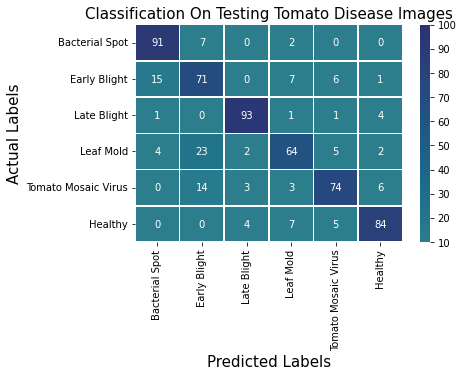

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_RF)
vmin = 10
vmax = 100
center = 0
xticklabels= ['Bacterial Spot','Early Blight','Late Blight','Leaf Mold','Tomato Mosaic Virus', 'Healthy']
yticklabels= ['Bacterial Spot','Early Blight','Late Blight','Leaf Mold','Tomato Mosaic Virus', 'Healthy']
sns.heatmap(cm, annot=True,linewidth=.5,cmap="crest",vmin=vmin,vmax=vmax,center=center,xticklabels=xticklabels,yticklabels=yticklabels)
font1 = {'size': 15}
font2 = {'size':15}
plt.title("Classification On Testing Tomato Disease Images",fontdict = font1)
plt.xlabel("Predicted Labels",fontdict = font2)
plt.ylabel("Actual Labels",fontdict = font2)
plt.show()

In [31]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))
print ("Precision = ", metrics.precision_score(test_labels, prediction_RF,average='macro'))
print ("Recall = ", metrics.recall_score(test_labels, prediction_RF,average='micro'))
print ("F1 Score = ", metrics.f1_score(test_labels, prediction_RF,average='micro'))

Accuracy =  0.795
Precision =  0.7983411310974787
Recall =  0.795
F1 Score =  0.795


1/1 [==============================] - 0s 329ms/step
The prediction for this image is:  ['Early Blight']
The actual label for this image is:  Early Blight


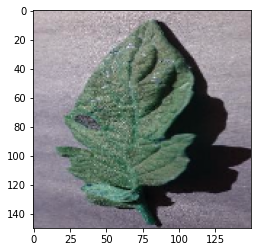

In [32]:
n=33 #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor.predict(input_img)
prediction_RF = RF_model.predict(input_img_features)
prediction_RF = le.inverse_transform(prediction_RF)  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])

# **ResNet50 as feature extractor and Support Vector Machine as classifier**

In [33]:
x_feature_SVM_train = feature_extractor.predict(x_train)

188/188 [==============================] - 8s 44ms/step


In [34]:
from sklearn.svm import SVC
support_vector_classification = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0)
support_vector_classification.fit(x_feature_SVM_train , y_train)

SVC()

In [35]:
x_feature_SVM_test = feature_extractor.predict(x_test)
predicted_SVC = support_vector_classification.predict(x_feature_SVM_test)
predicted_SVC = le.inverse_transform(predicted_SVC)
predicted_SVC

19/19 [==============================] - 1s 47ms/step


array(['Leaf Mold', 'Early Blight', 'Early Blight', 'Leaf Mold',
       'Late Blight', 'Late Blight', 'Bacterial Spot', 'Bacterial Spot',
       'Bacterial Spot', 'Bacterial Spot', 'Late Blight', 'Late Blight',
       'Leaf Mold', 'Early Blight', 'Bacterial Spot', 'Early Blight',
       'Early Blight', 'Early Blight', 'Early Blight', 'Bacterial Spot',
       'Early Blight', 'Bacterial Spot', 'Early Blight', 'Late Blight',
       'Late Blight', 'Bacterial Spot', 'Early Blight', 'Early Blight',
       'Early Blight', 'Early Blight', 'Leaf Mold', 'Bacterial Spot',
       'Early Blight', 'Early Blight', 'Bacterial Spot', 'Bacterial Spot',
       'Early Blight', 'Early Blight', 'Bacterial Spot', 'Early Blight',
       'Early Blight', 'Early Blight', 'Late Blight', 'Early Blight',
       'Early Blight', 'Early Blight', 'Early Blight', 'Early Blight',
       'Early Blight', 'Bacterial Spot', 'Late Blight', 'Early Blight',
       'Tomato Mosaic Virus', 'Early Blight', 'Early Blight',
       'B

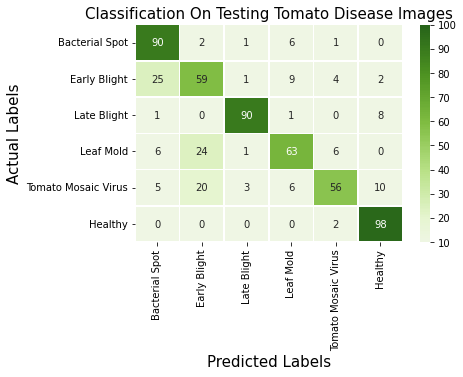

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, predicted_SVC)
vmin = 10
vmax = 100
center = 0
xticklabels= ['Bacterial Spot','Early Blight','Late Blight','Leaf Mold','Tomato Mosaic Virus', 'Healthy']
yticklabels= ['Bacterial Spot','Early Blight','Late Blight','Leaf Mold','Tomato Mosaic Virus', 'Healthy']
sns.heatmap(cm, annot=True,linewidth=.5,cmap="PiYG",vmin=vmin,vmax=vmax,center=center,xticklabels=xticklabels,yticklabels=yticklabels)
font1 = {'size': 15}
font2 = {'size':15}
plt.title("Classification On Testing Tomato Disease Images",fontdict = font1)
plt.xlabel("Predicted Labels",fontdict = font2)
plt.ylabel("Actual Labels",fontdict = font2)
plt.show()

In [37]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels,predicted_SVC))
print ("Precision = ", metrics.precision_score(test_labels, predicted_SVC,average='macro'))
print ("Recall = ", metrics.recall_score(test_labels, predicted_SVC,average='micro'))
print ("F1 Score = ", metrics.f1_score(test_labels, predicted_SVC,average='micro'))

Accuracy =  0.76
Precision =  0.7652242212151089
Recall =  0.76
F1 Score =  0.76


1/1 [==============================] - 0s 40ms/step
The prediction for this image is:  ['Tomato Mosaic Virus']
The actual label for this image is:  Early Blight


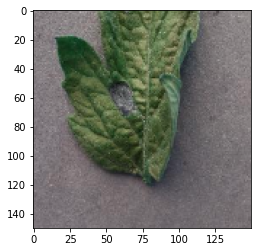

In [38]:
n = 56 #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor.predict(input_img)
predicted_SVC = support_vector_classification.predict(input_img_features)
predicted_SVC = le.inverse_transform(predicted_SVC)  #Reverse the label encoder to original name
print("The prediction for this image is: ", predicted_SVC)
print("The actual label for this image is: ", test_labels[n])

# **ResNet50 as feature extractor and Decision Tree as a classifier**

In [39]:
x_feature_DecisionTreeClassifier_train = feature_extractor.predict(x_train)

188/188 [==============================] - 8s 45ms/step


In [40]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0)
decision_tree.fit(x_feature_DecisionTreeClassifier_train , y_train)

DecisionTreeClassifier()

In [41]:
x_feature_DecisionTreeClassifier_test = feature_extractor.predict(x_test)
predicted_DecisionTree = decision_tree.predict(x_feature_DecisionTreeClassifier_test)
predicted_DecisionTree = le.inverse_transform(predicted_DecisionTree)
predicted_DecisionTree

19/19 [==============================] - 1s 47ms/step


array(['Late Blight', 'Early Blight', 'Leaf Mold', 'Early Blight',
       'Late Blight', 'Late Blight', 'Late Blight', 'Tomato Mosaic Virus',
       'Leaf Mold', 'Early Blight', 'Leaf Mold', 'Late Blight',
       'Early Blight', 'Early Blight', 'Early Blight', 'Early Blight',
       'Early Blight', 'Late Blight', 'Late Blight', 'Early Blight',
       'Late Blight', 'Bacterial Spot', 'Healthy', 'Bacterial Spot',
       'Bacterial Spot', 'Late Blight', 'Late Blight', 'Late Blight',
       'Healthy', 'Bacterial Spot', 'Leaf Mold', 'Bacterial Spot',
       'Bacterial Spot', 'Late Blight', 'Bacterial Spot', 'Early Blight',
       'Early Blight', 'Late Blight', 'Bacterial Spot', 'Early Blight',
       'Late Blight', 'Bacterial Spot', 'Bacterial Spot', 'Late Blight',
       'Early Blight', 'Early Blight', 'Late Blight', 'Leaf Mold',
       'Late Blight', 'Bacterial Spot', 'Healthy', 'Early Blight',
       'Healthy', 'Leaf Mold', 'Early Blight', 'Leaf Mold',
       'Early Blight', 'Bacterial S

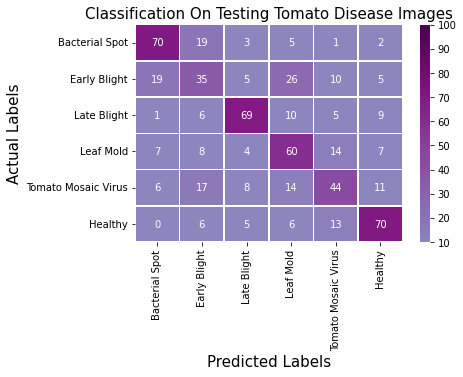

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels,predicted_DecisionTree)
vmin = 10
vmax = 100
center = 0
xticklabels= ['Bacterial Spot','Early Blight','Late Blight','Leaf Mold','Tomato Mosaic Virus', 'Healthy']
yticklabels= ['Bacterial Spot','Early Blight','Late Blight','Leaf Mold','Tomato Mosaic Virus', 'Healthy']
sns.heatmap(cm, annot=True,linewidth=.5,cmap="BuPu",vmin=vmin,vmax=vmax,center=center,xticklabels=xticklabels,yticklabels=yticklabels)
font1 = {'size': 15}
font2 = {'size':15}
plt.title("Classification On Testing Tomato Disease Images",fontdict = font1)
plt.xlabel("Predicted Labels",fontdict = font2)
plt.ylabel("Actual Labels",fontdict = font2)
plt.show()

In [43]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, predicted_DecisionTree))
print ("Precision = ", metrics.precision_score(test_labels, predicted_DecisionTree,average='macro'))
print ("Recall = ", metrics.recall_score(test_labels, predicted_DecisionTree,average='micro'))
print ("F1 Score = ", metrics.f1_score(test_labels, predicted_DecisionTree,average='micro'))

Accuracy =  0.58
Precision =  0.5788269010668429
Recall =  0.58
F1 Score =  0.58


1/1 [==============================] - 0s 35ms/step
The prediction for this image is:  ['Early Blight']
The actual label for this image is:  Early Blight


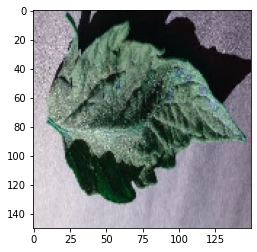

In [44]:
n = 70 #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor.predict(input_img)
predicted_DecisionTree = decision_tree.predict(input_img_features)
predicted_DecisionTree = le.inverse_transform(predicted_DecisionTree)  #Reverse the label encoder to original name
print("The prediction for this image is: ", predicted_DecisionTree)
print("The actual label for this image is: ", test_labels[n])

# **ResNet50 as feature extractor and K Nearest Neighbors (KNN) as classifier**

In [45]:
x_feature_KNN_train = feature_extractor.predict(x_train)

188/188 [==============================] - 8s 45ms/step


In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
knn.fit(x_feature_KNN_train , y_train)

KNeighborsClassifier()

In [47]:
x_feature_KNN_test = feature_extractor.predict(x_test)
knn_predicted = knn.predict(x_feature_KNN_test)
knn_predicted = le.inverse_transform(knn_predicted)
knn_predicted

19/19 [==============================] - 1s 47ms/step


array(['Early Blight', 'Leaf Mold', 'Early Blight', 'Leaf Mold',
       'Tomato Mosaic Virus', 'Tomato Mosaic Virus', 'Early Blight',
       'Leaf Mold', 'Tomato Mosaic Virus', 'Bacterial Spot',
       'Bacterial Spot', 'Late Blight', 'Leaf Mold', 'Early Blight',
       'Bacterial Spot', 'Bacterial Spot', 'Bacterial Spot',
       'Early Blight', 'Leaf Mold', 'Bacterial Spot', 'Late Blight',
       'Bacterial Spot', 'Bacterial Spot', 'Bacterial Spot', 'Leaf Mold',
       'Bacterial Spot', 'Early Blight', 'Early Blight', 'Early Blight',
       'Tomato Mosaic Virus', 'Tomato Mosaic Virus', 'Bacterial Spot',
       'Early Blight', 'Early Blight', 'Bacterial Spot', 'Bacterial Spot',
       'Leaf Mold', 'Early Blight', 'Bacterial Spot', 'Bacterial Spot',
       'Early Blight', 'Tomato Mosaic Virus', 'Bacterial Spot',
       'Leaf Mold', 'Tomato Mosaic Virus', 'Early Blight', 'Leaf Mold',
       'Early Blight', 'Tomato Mosaic Virus', 'Leaf Mold',
       'Tomato Mosaic Virus', 'Bacterial Spot'

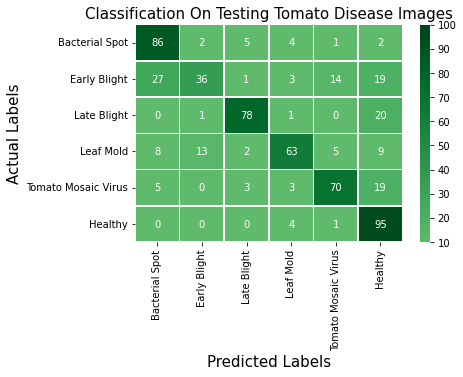

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, knn_predicted)
vmin = 10
vmax = 100
center = 0
xticklabels= ['Bacterial Spot','Early Blight','Late Blight','Leaf Mold','Tomato Mosaic Virus', 'Healthy']
yticklabels= ['Bacterial Spot','Early Blight','Late Blight','Leaf Mold','Tomato Mosaic Virus', 'Healthy']
sns.heatmap(cm, annot=True,linewidth=.5,cmap="Greens",vmin=vmin,vmax=vmax,center=center,xticklabels=xticklabels,yticklabels=yticklabels)
font1 = {'size': 15}
font2 = {'size':15}
plt.title("Classification On Testing Tomato Disease Images",fontdict = font1)
plt.xlabel("Predicted Labels",fontdict = font2)
plt.ylabel("Actual Labels",fontdict = font2)
plt.show()

In [50]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels,knn_predicted))
print ("Precision = ", metrics.precision_score(test_labels, knn_predicted,average='macro'))
print ("Recall = ", metrics.recall_score(test_labels, knn_predicted,average='micro'))
print ("F1 Score = ", metrics.f1_score(test_labels, knn_predicted,average='micro'))

Accuracy =  0.7133333333333334
Precision =  0.7345738731392335
Recall =  0.7133333333333334
F1 Score =  0.7133333333333335


1/1 [==============================] - 0s 59ms/step
The prediction for this image is:  ['Healthy']
The actual label for this image is:  Healthy


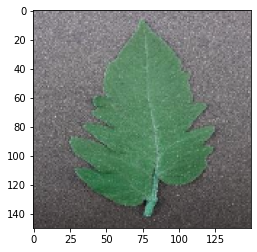

In [51]:
n = 100 #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor.predict(input_img)
knn_predicted = knn.predict(input_img_features)
knn_predicted = le.inverse_transform(knn_predicted)  #Reverse the label encoder to original name
print("The prediction for this image is: ", knn_predicted)
print("The actual label for this image is: ", test_labels[n])